In [1]:
import tensorflow as tf
import numpy as np
import os
import skimage

In [2]:
path = "croppedImages/"

num = 500 #ca 80 000 in folder

dataset = []

for img in range(1,num + 1): 
    img_array = skimage.util.img_as_float32(skimage.io.imread(path + str(img) + ".png"))
    dataset.append(img_array.flatten())

print(len(dataset))

500


In [3]:
import random

random.shuffle(dataset)

training = np.array(dataset [0:int(num*0.8)])
testing = np.array(dataset [int(num*0.8):])

print(training.shape)
print(testing.shape)

(400, 196608)
(100, 196608)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16*16*3, input_dim=training.shape[1], activation='relu'))
model.add(Dense(training.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(training,training,batch_size = 64, verbose=1,epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
400/400 [==============================] - 26s 66ms/sample - loss: 0.9824
Epoch 2/5
400/400 [==============================] - 19s 47ms/sample - loss: 0.1923
Epoch 3/5
400/400 [==============================] - 19s 48ms/sample - loss: 0.0413
Epoch 4/5
400/400 [==============================] - 19s 48ms/sample - loss: 0.0343
Epoch 5/5
400/400 [==============================] - 19s 47ms/sample - loss: 0.0256


Score neural network


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


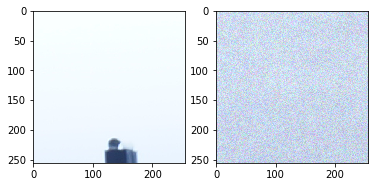

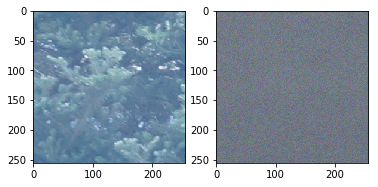

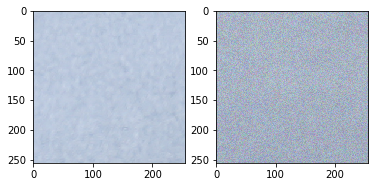

In [7]:
from PIL import Image

print("Score neural network")
pred = model.predict(testing)

cols,rows = 256,256
for i in range(3):
    predicted = pred[i].reshape(rows,cols,3)
    original = testing[i].reshape(rows,cols,3)   
    
    skimage.io.imshow_collection([original,predicted])
    skimage.io.show()

In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2043599250108325384, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13588688677441376776
 physical_device_desc: "device: XLA_CPU device"]